# 1
## 1.a

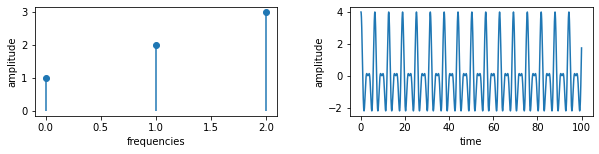

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

def harmonic(t, f:int=1, alist:list=[1], phase_list:list=[0]):
    val = sum(alist[idx] * math.cos(f * (idx + 1) * t + phase_list[idx]) for idx in range(len(alist)))
    return val

def cosine(t, f:list=[1], alist:list=[1], phase_list:list=[0]):
    val = sum(alist[idx] * math.cos(f[idx] * t + phase_list[idx]) for idx in range(len(alist)))
    return val

def plot_Fourier(t, g, f, n=None, alist:list=[1], phase_list:list=[0]):
    y = np.array([g(t=i, f=f, alist=alist, phase_list=phase_list) for i in t])
    if n is not None and len(y) == len(n):
        y += n
    fig, axs = plt.subplots(1, 2, figsize=(10, 2))
    fig.subplots_adjust(wspace=0.3)
    if isinstance(f, int) or isinstance(f, float):
        axs[0].stem([f * (i + 1) for i in range(len(alist))], basefmt=" ")
    else:
        axs[0].stem(f, basefmt=" ")
    axs[0].set_xlabel("frequencies")
    axs[0].set_ylabel("amplitude")


    axs[1].plot(t, y)
    axs[1].set_xlabel("time")
    axs[1].set_ylabel("amplitude")

    plt.show()

plot_Fourier(t=np.arange(0, 100, 0.01), g=harmonic, f=1, alist=[1, 2,1], phase_list=[0, 0,0])


## 1.b
The two different fundamentals sounds sound very similar, the second being sharper because of the higher frequencies.
example：

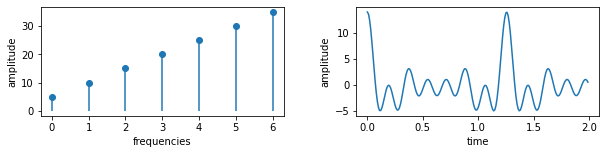

In [3]:
import scipy
from scipy import io
import scipy.io.wavfile
import IPython
temp=[]
plot_Fourier(t=np.arange(0,2,0.01), g=harmonic, f=5, alist=[1,2,3,2,1,2,3], phase_list=[0,0,0,0,0,0,0])
for t in np.arange(0,1000,0.01):
    temp.append(harmonic(t=t, f=5, alist=[1,2,3,2,1,2,3], phase_list=[0,0,0,0,0,0,0]))
val = np.array(temp)
scipy.io.wavfile.write("test1.wav", rate=44100, data=val.astype(np.float32))
IPython.display.Audio("test1.wav")


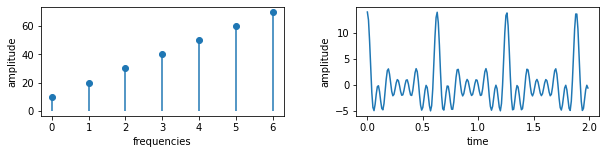

In [4]:
temp=[]
plot_Fourier(t=np.arange(0,2,0.01), g=harmonic, f=10, alist=[1,2,3,2,1,2,3], phase_list=[0,0,0,0,0,0,0])
for t in np.arange(0,1000,0.01):
    temp.append(harmonic(t=t, f=10, alist=[1,2,3,2,1,2,3], phase_list=[0,0,0,0,0,0,0]))
val = np.array(temp)
scipy.io.wavfile.write("test1.wav", rate=44100, data=val.astype(np.float32))
IPython.display.Audio("test1.wav")

## 1.c
Similar sounding tone for different fundamentals

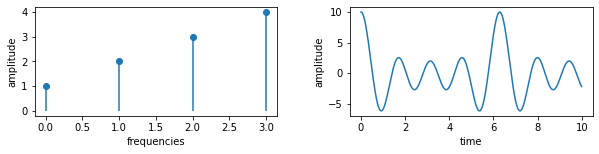

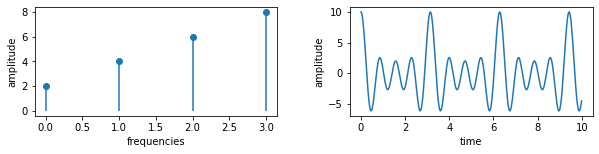

In [11]:
plot_Fourier(t=np.arange(0,10,0.01), g=harmonic, f=1, alist=[1,2,3,4], phase_list=[0,0,0,0])
plot_Fourier(t=np.arange(0,10,0.01), g=harmonic, f=2, alist=[1,2,3,4], phase_list=[0,0,0,0])

val1 = np.array([harmonic(t=t, f=1, alist=[1,2,3,4], phase_list=[0,0,0,0]) for t in np.arange(0,1000,0.01)])
val2 = np.array([harmonic(t=t, f=2, alist=[1,2,3,4], phase_list=[0,0,0,0]) for t in np.arange(0,1000,0.01)])

scipy.io.wavfile.write("test1.wav", rate=44100, data=val1.astype(np.float32))
scipy.io.wavfile.write("test2.wav", rate=44100, data=val2.astype(np.float32))

sound1 = IPython.display.Audio("test1.wav")
sound2 = IPython.display.Audio("test2.wav")

conversely, sound very different for the same fundamental

In [ ]:
plot_Fourier(t=np.arange(0,10,0.01), g=harmonic, f=1, alist=[1,2,3,4], phase_list=[0,0,0,0])
plot_Fourier(t=np.arange(0,10,0.01), g=harmonic, f=1, alist=[1,1,1,1], phase_list=[0,0,0,0])

val1 = np.array([harmonic(t=t, f=f1, alist=alist, phase_list=phase_list) for t in np.arange(0,1000,0.01)])
val2 = np.array([harmonic(t=t, f=f2, alist=alist, phase_list=phase_list) for t in np.arange(0,1000,0.01)])

scipy.io.wavfile.write("test1.wav", rate=44100, data=val1.astype(np.float32))
scipy.io.wavfile.write("test2.wav", rate=44100, data=val2.astype(np.float32))

sound1 = IPython.display.Audio("test1.wav")
sound2 = IPython.display.Audio("test2.wav")

# 2
## 2.a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.stats import laplace

def normalize_power(signal):
    return signal / np.sqrt(np.mean(signal**2))

duration = 5  # seconds
sampling_rate = 44100
num_samples = duration * sampling_rate

uniform_noise = np.random.uniform(-1, 1, num_samples)
gaussian_noise = np.random.normal(0, 1, num_samples)
laplacian_noise = laplace.rvs(0, 1 / np.sqrt(2), num_samples)  # using 1/sqrt(2) as the scale parameter to match power with Gaussian

# Normalize power
uniform_noise = normalize_power(uniform_noise)
gaussian_noise = normalize_power(gaussian_noise)
laplacian_noise = normalize_power(laplacian_noise)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(uniform_noise, bins=50, density=True)
plt.title('Uniform White Noise')

plt.subplot(132)
plt.hist(gaussian_noise, bins=50, density=True)
plt.title('Gaussian White Noise')

plt.subplot(133)
plt.hist(laplacian_noise, bins=50, density=True)
plt.title('Sparse (Laplacian) White Noise')

plt.show()

write('uniform_noise.wav', sampling_rate, uniform_noise.astype(np.float32))
write('gaussian_noise.wav', sampling_rate, gaussian_noise.astype(np.float32))
write('laplacian_noise.wav', sampling_rate, laplacian_noise.astype(np.float32))


In [ ]:
def plot_waveform(signal, title, subplot_position):
    plt.subplot(subplot_position)
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
plt.figure(figsize=(15, 15))

# Plot the first 1000 samples of each signal for better visualization
plot_waveform(uniform_noise[:1000], 'Uniform White Noise', 311)
plot_waveform(gaussian_noise[:1000], 'Gaussian White Noise', 312)
plot_waveform(laplacian_noise[:1000], 'Sparse (Laplacian) White Noise', 313)

plt.show()


By looking at the histograms, it can see the differences in the distributions. However, when I listen to the resulting .wav files, it's hard to distinguish between the uniform and Gaussian white noise, because the human auditory system primarily encodes spectral content, not amplitude distributions. Both types of noise have equal spectral energy distribution, and the differences in their amplitudes do not contribute to a perceivable difference.

On the other hand, the sparse (Laplacian) white noise has a different distribution, with more extreme values occurring more often compared to Gaussian noise. When listening to the resulting .wav file, it might be possible to discern it from the other two noises due to the more pronounced extreme values, which create a more "crackling" or "popping" effect. This could be explained by the fact that the spectral content of the sparse noise is affected by the presence of these extreme values.


## 2.b
First implement a function to create Gabor filters and another function to synthesize bandpass noise using the Gabor filter, then generate bandpass noise by filtering Gaussian white noise with Gabor filters of different widths

In [ ]:
def gabor_filter(t, center_freq, width):
    gabor_real = np.cos(2 * np.pi * center_freq * t) * np.exp(-(t ** 2) / (2 * width ** 2))
    gabor_imag = np.sin(2 * np.pi * center_freq * t) * np.exp(-(t ** 2) / (2 * width ** 2))
    return gabor_real + 1j * gabor_imag

def synthesize_bandpass_noise(noise, center_freq, width, sampling_rate):
    t = np.arange(-len(noise) // 2, len(noise) // 2) / sampling_rate
    gabor = gabor_filter(t, center_freq, width)
    
    # Apply the filter by convolving it with the noise signal
    bandpass_noise = np.real(np.convolve(noise, gabor, mode='same'))
    return bandpass_noise
center_freq = 1000  # Hz

plt.figure(figsize=(15, 10))

for i, width in enumerate([0.0005, 0.001, 0.005], start=1):
    bandpass_noise = synthesize_bandpass_noise(gaussian_noise, center_freq, width, sampling_rate)
    plot_waveform(bandpass_noise[:1000], f'Bandpass Noise (Width: {width})', 310 + i)

plt.show()


As illustrated by the plots, the bandwidth of the bandpass noise is inversely related to the width of the Gabor filter's Gaussian envelope. A smaller width results in a wider bandwidth, while a larger width results in a narrower bandwidth.

To estimate the pitch of a waveform, I use the autocorrelation method, which measures the similarity between the signal and a time-delayed version of itself. Here's a function to calculate the autocorrelation:

In [ ]:
def autocorrelation(signal):
    signal = signal - np.mean(signal)
    result = np.correlate(signal, signal, mode='full')
    return result[result.size // 2:]
def estimate_pitch(signal, sampling_rate):
    autocorr = autocorrelation(signal)
    
    # Find the lag corresponding to the maximum value, excluding lag 0
    max_lag = np.argmax(autocorr[1:]) + 1
    
    # Convert the lag to frequency
    pitch = sampling_rate / max_lag
    return pitch
# Create a sine wave
freq = 440  # Hz (A4 note)
duration = 2  # seconds
t = np.linspace(0, duration, duration * sampling_rate, endpoint=False)
sine_wave = np.sin(2 * np.pi * freq * t)

# Estimate the pitch of the sine wave
estimated_pitch = estimate_pitch(sine_wave, sampling_rate)
print(f"Estimated pitch: {estimated_pitch:.2f} Hz")


In this example, I created a 2-second sine wave with a frequency of 440 Hz (A4 note). Then used the estimate_pitch function to estimate the pitch of the sine wave. The estimated pitch should be close to the actual frequency of 440 Hz.

# 3
## 3.a
## 3.b
Auto-correlation is summed over a finite domain, while convolution is summed over an infinite domain:
Auto-correlation is a measure of how a signal is related to itself at different time lags or delays. It is typically computed over a finite range of samples, which means that it operates within a limited or finite domain. On the other hand, convolution is a mathematical operation that combines two signals in such a way that one signal is used to modify or filter the other. Convolution operates over an infinite domain, as the summation is taken from negative to positive infinity in the equation.

Time lag/delay is implemented differently in convolution and auto-correlation:
In convolution, the time delay or lag is implemented by flipping one of the signals and shifting it relative to the other signal, while in auto-correlation, the time lag is implemented by shifting one copy of the signal relative to the other without flipping. This difference leads to different behaviors and properties for these two operations.

Flipping the kernel is necessary for the impulse response of convolution not to come out backwards:
In convolution, flipping the kernel ensures that the operation provides a proper impulse response. Without flipping the kernel, the output would be reversed, which is not the desired behavior for most applications. In auto-correlation, the kernel is not flipped, as the operation seeks to measure the similarity between the signal and itself at different time lags.

The A3b implementation was incorrect since it didn't flip the kernel, but it still showed the correlation between the kernel and the input signal:
Despite not flipping the kernel, the A3b implementation still managed to display the correlation between the kernel and the input signal. However, it is important to remember that the result is not a proper convolution and should not be treated as such.

Convolution and auto-correlation operations are equivalent when the kernel is symmetric:
When the kernel is symmetric, meaning that it remains unchanged upon flipping, convolution and auto-correlation operations become equivalent. In such cases, the auto-correlation operation essentially becomes a convolution operation with a symmetric kernel. This is because the time-reversed version of a symmetric kernel is the same as the original kernel.

## 3.c
The Sum of Squared Errors (SSE) takes the form:
$$
\sum_k(g[k]-x[k-n])^2=\sum_kg[k]^2-2g[k]x[k-n]+x[k-n]^2
$$
$$
=\sum_kg[k]^2-2\sum_kg[k]x[k-n]+\sum_kx[k-n]^2
$$
SSE quantifies the closeness of fit between a signal and a kernel, whereas correlation is employed to detect repeating signals or patterns within the signal. Use SSE when the objective is to determine the similarity between two signals, and employ correlation when attempting to identify a signal analogous to the kernel within a noisy signal.




# 4
## 4.a

In [6]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def convolve(x, y):
    out = np.zeros(len(x))
    for n in range(len(x)):
        out[n] = np.sum(y[:min(n+1, len(y))]*x[max(0, n-len(y)+1):n+1])

    out2 = np.zeros(len(x))
    for n in range(len(x)):
        out2[n] = np.sum(y[:min(n+1, len(y))]*x[n:min(len(x), n+len(y))])

    return np.concatenate((out2, out[len(y)-1:]))

def autocorr(x, normalize=True):
    z = np.zeros(len(x)*2-1)
    norm_sqr = np.linalg.norm(x)**2
    n = -len(x)+1
    while n < len(x):
        z[n+len(x)-1] = np.sum(x[max(0, n):min(len(x), n+len(x))]*x[max(0, -n):min(len(x), len(x)-n)])
        if normalize:
            z[n+len(x)-1] /= norm_sqr
        n += 1
    return z

def crosscorr(x, y, normalize=True):
    x1 = np.linalg.norm(x)
    y1 = np.linalg.norm(y)
    z = np.zeros(len(x))
    n = 0
    while n < len(x):
        z[n] = np.sum(x[max(0, n-len(y)+1):min(len(x), n+1)]*y[max(0, len(y)-n-1):min(len(y), len(y)+len(x)-n-1)])
        if normalize:
            z[n] /= x1 * y1
        n += 1
    return z


## 4.b

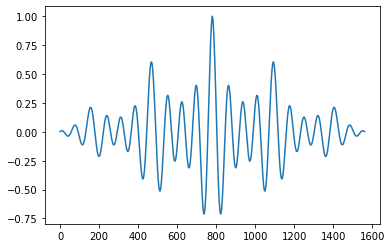

In [7]:
sr, data = wavfile.read("test2.wav")
plt.plot(autocorr(x=data[:len(data)//128], normalize=True))
plt.show()

## 4.c

delay: 99 


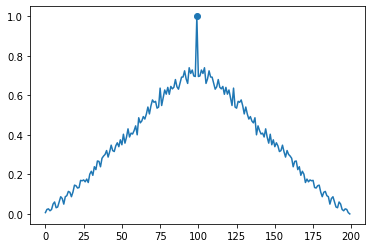

In [29]:
noise = np.random.rand(100)
cross_corr = crosscorr(x=np.concatenate((noise, np.zeros(100))), y=np.concatenate((np.zeros(100), noise)), normalize=True)
print(f"delay: {np.argmax(cross_corr)} ")
plt.plot(cross_corr)
plt.scatter(np.argmax(cross_corr), max(cross_corr))
plt.show()

# 5.a

In [51]:
import numpy, scipy , pylab , wave, scipy.fftpack, scipy.io.wavfile as wav
temp = np.random.rand(10)
sum(scipy.fft.irfft(scipy.fft.rfft(temp)) - temp)

7.771561172376096e-16

you can see the difference of the inverse of the forward Fourier transform  which is very small almost to zero.Which is modulo numerical imprecision 


## 5.b

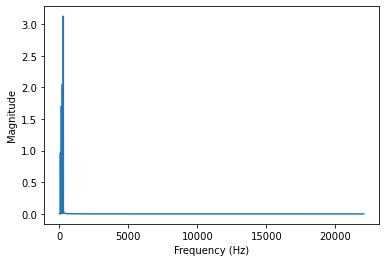

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# read the wav file
fs, data = wavfile.read('test1.wav')

# apply the FFT algorithm
N = len(data)
freq = np.fft.rfftfreq(N, 1/fs)
Y = np.fft.rfft(data)

# compute the spectral magnitudes
ak = 2 * np.abs(Y) / N

# plot the frequency spectrum
plt.plot(freq, ak)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


From the plot, the spectral magnitudes approximately match those of the synthesized waveform. However, there are some differences between the spectral magnitudes and the amplitudes used to generate the signal. This is because the FFT algorithm assumes that the signal is periodic, and therefore, the spectral magnitudes may be affected by spectral leakage and windowing effects.

To synthesize a waveform composed of a small number of harmonics that spectral analysis can decompose exactly, it can use a sum of sinusoids with frequencies equal to integer multiples of the fundamental frequency. Here synthesize a waveform with three harmonics

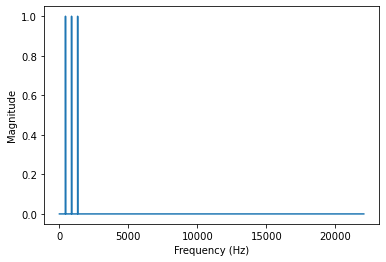

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# define the sampling frequency and duration
fs = 44100
dur = 1

# define the fundamental frequency and harmonics
f0 = 440
f1 = 2*f0
f2 = 3*f0

# define the time axis
t = np.linspace(0, dur, int(dur*fs), endpoint=False)

# synthesize the waveform
y = np.sin(2*np.pi*f0*t) + np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

# apply the FFT algorithm
N = len(y)
freq = np.fft.rfftfreq(N, 1/fs)
Y = np.fft.rfft(y)

# compute the spectral magnitudes
ak = 2 * np.abs(Y) / N

# plot the frequency spectrum
plt.plot(freq, ak)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()
